In [48]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {'Accepts' : 'application/json', 'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',}

session = Session()
session.headers.update(headers)

try:
 response = session.get(url, params=parameters)
 data = json.loads(response.text)
except(ConnectionError, Timeout, TooManyRedirects) as e:
 print(e)

In [49]:
type(data)

dict

In [50]:
import pandas as pd

# this allows to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [51]:
# this normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df.head()

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_10388\3234617221.py:3: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10542,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19537462.00000,19537462.00000,False,NaN,1,NaN,NaN,None,2023-11-09T14:50:00.000Z,37778.90081,30018965442.70616,69.67790,1.87659,7.00312,8.06629,37.55425,46.54142,28.02894,738103838925.20142,52.66010,793356916954.17004,None,2023-11-09T14:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 14:51:46.549096
1,1027,Ethereum,ETH,ethereum,7740,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120266596.55917,120266596.55917,True,NaN,2,NaN,NaN,None,2023-11-09T14:50:00.000Z,1945.74564,11474234457.54587,56.81270,1.37857,3.18501,7.05399,23.36158,19.88935,4.95808,234008206214.73053,16.69280,234008206214.73001,None,2023-11-09T14:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 14:51:46.549096
2,825,Tether USDt,USDT,tether,65348,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,86263964467.18793,88623656723.66240,True,NaN,3,NaN,NaN,None,2023-11-09T14:49:00.000Z,1.00026,48783853864.08031,47.42770,-0.03446,-0.01380,-0.02419,-0.03833,0.04243,0.12312,86286095376.38338,6.15610,88646393008.87000,None,2023-11-09T14:49:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-09 14:51:46.549096
3,1839,BNB,BNB,bnb,1750,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151702235.05188,151702235.05188,False,NaN,4,NaN,NaN,None,2023-11-09T14:49:00.000Z,251.56409,833801812.70279,87.51840,1.17595,2.34766,8.75207,20.75122,18.33519,4.43781,38162835207.30584,2.72230,38162835207.31000,None,2023-11-09T14:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 14:51:46.549096
4,52,XRP,XRP,xrp,1136,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53615837759.00000,99988316618.00000,False,NaN,5,NaN,NaN,None,2023-11-09T14:50:00.000Z,0.69239,2284760996.17985,6.15840,1.35929,1.31100,13.55402,39.41692,39.08895,9.35548,37123142635.44703,2.64810,69239135649.27000,None,2023-11-09T14:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 14:51:46.549096


In [52]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {'Accepts' : 'application/json', 'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',}

    session = Session()
    session.headers.update(headers)

    try:
     response = session.get(url, params=parameters)
     data = json.loads(response.text)
    except(ConnectionError, Timeout, TooManyRedirects) as e:
     print(e)
    
    # this normalizes the data and makes it all pretty in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    #if not os.path.isfile(r'C:\Users\ThinkPad\008 - Lab for me\11 - Pofolio Project\API.csv'):
     #   df.to_csv(r'C:\Users\ThinkPad\008 - Lab for me\11 - Pofolio Project\API.csv', header='column_names')
    #else:
     #   df.to_csv(r'C:\Users\ThinkPad\008 - Lab for me\11 - Pofolio Project\API.csv', mode='a', header=False)
    

In [53]:
import os
from  time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_10388\1072050212.py:22: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_10388\1072050212.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_10388\1072050212.py:22: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_10388\1072050212.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_10388\1072050212.py:22: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_10388\1072050212.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_10388\1072050212.py:22: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_10388\1072050212.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed


KeyboardInterrupt: 

In [54]:
df72 = pd.read_csv(r'C:\Users\ThinkPad\008 - Lab for me\11 - Pofolio Project\API.csv')
df72.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10520,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19534037.00000,19534037.00000,False,NaN,1,NaN,NaN,NaN,2023-11-05T15:07:00.000Z,34940.68673,10698377029.22469,-7.52280,-0.01972,0.53682,1.15035,26.12571,36.53459,20.62252,682532667347.10059,51.97960,733754421284.70996,NaN,2023-11-05T15:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-05 15:07:47.563570
1,1,1027,Ethereum,ETH,ethereum,7703,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120268913.44932,120268913.44932,True,NaN,2,NaN,NaN,NaN,2023-11-05T15:07:00.000Z,1881.21822,6950661709.50163,11.72220,0.11113,2.61849,4.76699,14.96770,15.88731,2.99610,226252070895.63809,17.23030,226252070895.64001,NaN,2023-11-05T15:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-05 15:07:47.563570
2,2,825,Tether USDt,USDT,tether,65110,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,85367759448.50455,88623656723.66614,True,NaN,3,NaN,NaN,NaN,2023-11-05T15:06:00.000Z,1.00092,23892406682.62473,0.36530,0.00997,0.02402,0.06492,0.07675,0.13615,0.21559,85446015348.27252,6.50720,88704897276.80000,NaN,2023-11-05T15:06:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-05 15:07:47.563570
3,3,1839,BNB,BNB,bnb,1740,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,151702899.88286,151702899.88286,False,NaN,4,NaN,NaN,NaN,2023-11-05T15:06:00.000Z,241.21696,375176044.64306,38.97600,0.05868,2.42033,6.13918,13.85138,12.82635,-0.03275,36593312024.53554,2.78540,36593312024.54000,NaN,2023-11-05T15:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-05 15:07:47.563570
4,4,52,XRP,XRP,xrp,1131,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53615837759.00000,99988316618.00000,False,NaN,5,NaN,NaN,NaN,2023-11-05T15:07:00.000Z,0.64660,1568667744.71610,61.34670,1.18040,5.70766,16.33606,23.82813,29.63653,5.38861,34668085460.30450,2.64020,64660158097.57000,NaN,2023-11-05T15:07:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-05 15:07:47.563570


In [55]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10542,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19537462.00000,19537462.00000,False,NaN,1,NaN,NaN,None,2023-11-09T14:50:00.000Z,37778.90081,30018965442.70616,69.67790,1.87659,7.00312,8.06629,37.55425,46.54142,28.02894,738103838925.20142,52.66010,793356916954.17004,None,2023-11-09T14:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 14:51:46.549096
1,1027,Ethereum,ETH,ethereum,7740,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120266596.55917,120266596.55917,True,NaN,2,NaN,NaN,None,2023-11-09T14:50:00.000Z,1945.74564,11474234457.54587,56.81270,1.37857,3.18501,7.05399,23.36158,19.88935,4.95808,234008206214.73053,16.69280,234008206214.73001,None,2023-11-09T14:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 14:51:46.549096
2,825,Tether USDt,USDT,tether,65348,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,86263964467.18793,88623656723.66240,True,NaN,3,NaN,NaN,None,2023-11-09T14:49:00.000Z,1.00026,48783853864.08031,47.42770,-0.03446,-0.01380,-0.02419,-0.03833,0.04243,0.12312,86286095376.38338,6.15610,88646393008.87000,None,2023-11-09T14:49:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-09 14:51:46.549096
3,1839,BNB,BNB,bnb,1750,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151702235.05188,151702235.05188,False,NaN,4,NaN,NaN,None,2023-11-09T14:49:00.000Z,251.56409,833801812.70279,87.51840,1.17595,2.34766,8.75207,20.75122,18.33519,4.43781,38162835207.30584,2.72230,38162835207.31000,None,2023-11-09T14:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 14:51:46.549096
4,52,XRP,XRP,xrp,1136,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53615837759.00000,99988316618.00000,False,NaN,5,NaN,NaN,None,2023-11-09T14:50:00.000Z,0.69239,2284760996.17985,6.15840,1.35929,1.31100,13.55402,39.41692,39.08895,9.35548,37123142635.44703,2.64810,69239135649.27000,None,2023-11-09T14:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 14:51:46.549096


In [56]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10542,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19537462.00000,19537462.00000,False,NaN,1,NaN,NaN,None,2023-11-09T14:50:00.000Z,37778.90081,30018965442.70616,69.67790,1.87659,7.00312,8.06629,37.55425,46.54142,28.02894,738103838925.20142,52.66010,793356916954.17004,None,2023-11-09T14:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 14:51:46.549096
1,1027,Ethereum,ETH,ethereum,7740,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120266596.55917,120266596.55917,True,NaN,2,NaN,NaN,None,2023-11-09T14:50:00.000Z,1945.74564,11474234457.54587,56.81270,1.37857,3.18501,7.05399,23.36158,19.88935,4.95808,234008206214.73053,16.69280,234008206214.73001,None,2023-11-09T14:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 14:51:46.549096
2,825,Tether USDt,USDT,tether,65348,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,86263964467.18793,88623656723.66240,True,NaN,3,NaN,NaN,None,2023-11-09T14:49:00.000Z,1.00026,48783853864.08031,47.42770,-0.03446,-0.01380,-0.02419,-0.03833,0.04243,0.12312,86286095376.38338,6.15610,88646393008.87000,None,2023-11-09T14:49:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-09 14:51:46.549096
3,1839,BNB,BNB,bnb,1750,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151702235.05188,151702235.05188,False,NaN,4,NaN,NaN,None,2023-11-09T14:49:00.000Z,251.56409,833801812.70279,87.51840,1.17595,2.34766,8.75207,20.75122,18.33519,4.43781,38162835207.30584,2.72230,38162835207.31000,None,2023-11-09T14:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 14:51:46.549096
4,52,XRP,XRP,xrp,1136,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53615837759.00000,99988316618.00000,False,NaN,5,NaN,NaN,None,2023-11-09T14:50:00.000Z,0.69239,2284760996.17985,6.15840,1.35929,1.31100,13.55402,39.41692,39.08895,9.35548,37123142635.44703,2.64810,69239135649.27000,None,2023-11-09T14:50:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-09 14:51:46.549096


In [57]:
# look at the coin trends over time
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 
                                    'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
                                    'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3.head()

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,1.97776,7.16870,8.27035,37.77240,46.79860,28.28214
Ethereum,2.00769,3.87497,7.80286,24.19543,20.71982,5.70862
Tether USDt,-0.02816,-0.00908,-0.01949,-0.01461,0.04151,0.12598
BNB,1.12623,2.40140,8.80094,20.93024,18.35732,4.50654
XRP,1.43683,1.43662,13.72558,39.68759,39.23539,9.56875


In [58]:
df4 = df3.stack()
df4.head(10)

name                                  
Bitcoin   quote.USD.percent_change_1h     1.97776
          quote.USD.percent_change_24h    7.16870
          quote.USD.percent_change_7d     8.27035
          quote.USD.percent_change_30d   37.77240
          quote.USD.percent_change_60d   46.79860
          quote.USD.percent_change_90d   28.28214
Ethereum  quote.USD.percent_change_1h     2.00769
          quote.USD.percent_change_24h    3.87497
          quote.USD.percent_change_7d     7.80286
          quote.USD.percent_change_30d   24.19543
dtype: float64

In [59]:
type(df4)

pandas.core.series.Series

In [60]:
df5 = df4.to_frame(name='values')
df5.head(10)

values
name                                          
Bitcoin  quote.USD.percent_change_1h   1.97776
         quote.USD.percent_change_24h  7.16870
         quote.USD.percent_change_7d   8.27035
         quote.USD.percent_change_30d 37.77240
         quote.USD.percent_change_60d 46.79860
         quote.USD.percent_change_90d 28.28214
Ethereum quote.USD.percent_change_1h   2.00769
         quote.USD.percent_change_24h  3.87497
         quote.USD.percent_change_7d   7.80286
         quote.USD.percent_change_30d 24.19543

In [61]:
df5.count()

values    90
dtype: int64

In [62]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6.head()

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,1.97776
1,Bitcoin,quote.USD.percent_change_24h,7.16870
2,Bitcoin,quote.USD.percent_change_7d,8.27035
3,Bitcoin,quote.USD.percent_change_30d,37.77240
4,Bitcoin,quote.USD.percent_change_60d,46.79860


In [63]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7.head()

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,1.97776
1,Bitcoin,quote.USD.percent_change_24h,7.16870
2,Bitcoin,quote.USD.percent_change_7d,8.27035
3,Bitcoin,quote.USD.percent_change_30d,37.77240
4,Bitcoin,quote.USD.percent_change_60d,46.79860


In [64]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
                                    'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], 
                                    ['1h', '24h', '7d', '30d', '60d', '90d'])
df7.head()

,name,percent_change,values
0,Bitcoin,1h,1.97776
1,Bitcoin,24h,7.16870
2,Bitcoin,7d,8.27035
3,Bitcoin,30d,37.77240
4,Bitcoin,60d,46.79860


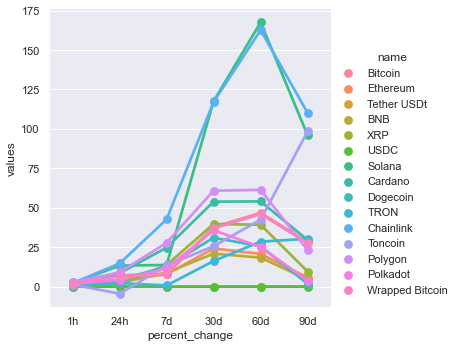

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [77]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10 = df10.groupby('timestamp')['quote.USD.price'].mean().reset_index()

df10.head()

,timestamp,quote.USD.price
0,2023-11-09 14:51:46.549096,37778.90081
1,2023-11-09 14:51:49.112157,37778.90081
2,2023-11-09 14:52:49.824598,37792.28255
3,2023-11-09 14:53:51.067640,37918.33185
4,2023-11-09 14:54:51.782300,37926.25680


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

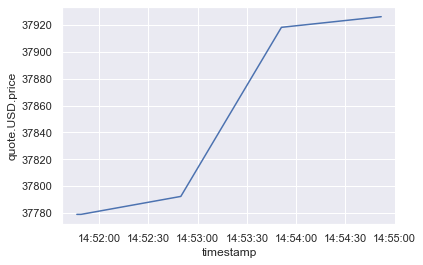

In [78]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)